# 导入库

In [1]:
import pandas as pd
import numpy as np
import re
import jieba
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 导入数据

In [27]:
data = pd.read_csv('C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/新浪公司研报.csv')
data.head()

,_id,cate,content,date,ins,person,title
0,60715ab0a68de4a0c42408aa,公司,事件： \r\n 公司发布2021 年第一季度业绩预增公告。公司2021...,2021-04-09,上海申银万国证券研究所有限公司,张雷/陈明雨/黄华栋,东方电缆(603606)：完善产业布局 海缆及海工业务高速增长
1,60715ab2a68de4a0c42408af,公司,2020 年营收基本与2019 年持平，现金分红比例高达123%2020 年营收约1...,2021-04-09,浙商证券股份有限公司,王华君/李锋,美亚光电(002690)：2020年现金分红比例高达123%；2021年Q1高增长可期
2,60715ab5a68de4a0c42408b1,公司,事件 \r\n 2020 年报：公司发布2020 年年报以及2021 年...,2021-04-09,中信建投证券股份有限公司,郑勇,金禾实业(002597)：食品添加剂持续量增巩固龙头地位 资本开支大幅上行蓄力未来
3,60715ac1a68de4a0c42408b8,公司,事件 \r\n 公司发布2020 年年报：2020 年合计实现营业收入1...,2021-04-09,中信建投证券股份有限公司,郑勇/邓天泽,梅花生物(600873)：以量补价业绩稳健 21年业绩可期集中释放
4,60715ac1a68de4a0c42408ba,公司,公司20 年实现收入114.52 亿元，同比+29.34%；归母净利润8.38 亿元...,2021-04-09,招商证券股份有限公司,刘荣/时文博,杭叉集团(603298)：精益管理消化原材料价格影响 尽显龙头优势


In [32]:
# 一个例子
sample = data['content'][4]
sample

'    公司20 年实现收入114.52 亿元，同比+29.34%；归母净利润8.38 亿元，同比+29.99%；其中，20Q4 实现收入32.43 亿元，+54.14%；20Q4 实现归母净利润2.11 亿元，增长26.92%。精益化管理及规模效应使得公司在采购原材料及零部件环节溢价能力强，淡化原材料涨价带来的成本上升风险，Q4 毛利率环比微降0.94pct，优于同行业竞争对手。 \xa0\xa0\xa0\r\n    杭叉20 年综合净利率为8.1%，与去年持平，其中Q4 净利率为7.42%。受益于制造业投资回升和物流仓储需求增长，行业景气度从3 月开始迅速回暖，根据工程机械协会统计销量，行业20 年销量同比+32%，杭叉销量同比+49%，增速远高于行业，略高于合力（+45%），杭叉国内市占率提升4%。从收入端看，全年收入增速29.34%，低于销量增速49%，一方面由于产品价格调整，另一方面是价值量较低的电动步行式仓储叉车占比提升。从利润端看，全年综合毛利率20.35%，净利率8.1%，较19 年毛利率微降1 个百分点，净利率持平。 \xa0\xa0\xa0\r\n    人民币升值影响较大，2020 年汇兑损失3597 万元，扣非归母净利润7.8 亿元，同比+44%。 \xa0\xa0\xa0\r\n    扣除2020、2019 年投资收益（2020：中策投资收益1.73 亿、银行理财2645万元）影响，20 年（扣非净利润-投资收益）同比+45.31%，反映了叉车的利润增长情况，处于行业领先地位。在20 年行业价格竞争激烈，下半年原材料涨价，人民币升值的背景下，杭叉业绩超预期，体现优质龙头企业在上游议价、成本管理和规模化效应上的优势。 \xa0\xa0\xa0\r\n    叉车销量与PMI 指数高度相关，且PMI 指数具有一定前瞻性，当前PMI 连续数月保持在50 的容枯线上，叠加电动平衡重式叉车替换内燃平衡重式叉车，电动步行式仓储叉车的增量空间，杭叉销量有望保持高景气。基于行业景气及杭叉自身的成本控制能力，目前估值20 倍左右相对合理。 \xa0\xa0\xa0\r\n    风险提示：原材料成本上涨盈利能力下降的风险；2021 年下半年增速放缓。'

In [59]:
sample = re.sub('\xa0\xa0\xa0\r\n','',sampl)
sample = re.sub(' ','',sample)
sample

'公司20年实现收入114.52亿元，同比+29.34%；归母净利润8.38亿元，同比+29.99%；其中，20Q4实现收入32.43亿元，+54.14%；20Q4实现归母净利润2.11亿元，增长26.92%。精益化管理及规模效应使得公司在采购原材料及零部件环节溢价能力强，淡化原材料涨价带来的成本上升风险，Q4毛利率环比微降0.94pct，优于同行业竞争对手。杭叉20年综合净利率为8.1%，与去年持平，其中Q4净利率为7.42%。受益于制造业投资回升和物流仓储需求增长，行业景气度从3月开始迅速回暖，根据工程机械协会统计销量，行业20年销量同比+32%，杭叉销量同比+49%，增速远高于行业，略高于合力（+45%），杭叉国内市占率提升4%。从收入端看，全年收入增速29.34%，低于销量增速49%，一方面由于产品价格调整，另一方面是价值量较低的电动步行式仓储叉车占比提升。从利润端看，全年综合毛利率20.35%，净利率8.1%，较19年毛利率微降1个百分点，净利率持平。人民币升值影响较大，2020年汇兑损失3597万元，扣非归母净利润7.8亿元，同比+44%。扣除2020、2019年投资收益（2020：中策投资收益1.73亿、银行理财2645万元）影响，20年（扣非净利润-投资收益）同比+45.31%，反映了叉车的利润增长情况，处于行业领先地位。在20年行业价格竞争激烈，下半年原材料涨价，人民币升值的背景下，杭叉业绩超预期，体现优质龙头企业在上游议价、成本管理和规模化效应上的优势。叉车销量与PMI指数高度相关，且PMI指数具有一定前瞻性，当前PMI连续数月保持在50的容枯线上，叠加电动平衡重式叉车替换内燃平衡重式叉车，电动步行式仓储叉车的增量空间，杭叉销量有望保持高景气。基于行业景气及杭叉自身的成本控制能力，目前估值20倍左右相对合理。风险提示：原材料成本上涨盈利能力下降的风险；2021年下半年增速放缓。'

# 计算句子平均长度

No handles with labels found to put in legend.


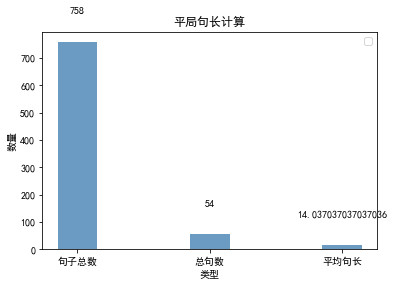

'14.037037037037036'

In [57]:
def calculate_avg_length(s, disp=False):
    lenn = 0 # 句子总长度
    num = 0 # 句子数
    sentences = re.split(r' *[\？！。，][\'"\)\]]* *', s)  # 把文本根据标点符号分割开
    for stuff in sentences:
        lenn = lenn + len(stuff)
        num = num +1
    # 是否可视化
    if disp:
        # 构建数据
        x_data = ["句子总数","总句数","平均句长"]
        y_data = [lenn,num,lenn/num]
        bar_width = 0.3
        # 将X轴数据改为使用range(len(x_data), 就是0、1、2...
        plt.bar(x=x_data, height=y_data, label='',
                color='steelblue', alpha=0.8, width=bar_width)
        # 将X轴数据改为使用np.arange(len(x_data))+bar_width,
        # 就是bar_width、1+bar_width、2+bar_width...这样就和第一个柱状图并列了

        # 在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
        for x, y in enumerate(y_data):
            plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
        # 设置标题
        plt.title("平局句长计算")
        # 为两条坐标轴设置名称
        plt.xlabel("类型")
        plt.ylabel("数量")
        # 显示图例
        plt.legend()
        plt.show()
    return str(lenn/num)
    
calculate_avg_length(sample,True)

# 情感计算

1. 文本分句分词
2. 匹配情感词典
3. 获取情感值
4. 计算每句情感值

In [81]:
#-*- coding : utf-8 -*-
# coding: utf-8
#定义一个函数加载词典
def dict_load(path):
    dict=[]
    with open(path, encoding='utf-8') as f:
        for line in f:
            if line.strip() !='':#养成去空好习惯
                dict.append(line.strip())
    return(dict)

#开始加载情感词典列表
neg_dict = [] #消极情感词典
pos_dict = [] #积极情感词典
no_dict = [] #否定词词典
dict_file_path='C:/Users/12968/Desktop/数据科学实战-stock prediction/程序/词典/'#词典位置，根据需要修改，注意转义符啥的！！！
pos_dict=dict_load(dict_file_path+'positive.txt')
#print(pos_dict)
print("==pos_dict loaded successfully==")
neg_dict=dict_load(dict_file_path+'negative.txt')
#print(neg_dict)
print("==neg_dict loaded successfully==")
no_dict=dict_load(dict_file_path+'inverse.txt')
#print(no_dict)
print("==no_dict loaded successfully==")
#加载情感词典结束'''


==pos_dict loaded successfully==
==neg_dict loaded successfully==
==no_dict loaded successfully==


In [69]:
#定义一个函数来判断句子中积极词、消极词词频
#===============#sent是分好词的列表格式或者序列格式====================
def sent_count(sent, negdict, posdict, nodict):
    pos = 0
    neg = 0
    for i in range(len(sent)):
        if sent[i] in negdict:
            if i==1 and sent[i-1] in nodict:
                pos=pos+1        #否定-消极
            elif i==1 and sent[i-1] not in nodict:
                neg=neg+1        #其他-消极
            elif i>1 and sent[i-1] in nodict:
                if sent[i-2] in nodict:
                    neg=neg+1   #否定-否定-消极
                else: 
                    pos=pos+1      #其他-否定-消极
            elif i>1 and sent[i-1] not in nodict:
                if sent[i-2] in nodict:
                    pos =pos+1  #否定-其他-消极
                else:
                    neg =neg+1  #其他-其他-消极
                    
        elif sent[i] in posdict:
            if i==1 and sent[i-1] in nodict:
                neg=neg+1        #否定-积极
            elif i==1 and sent[i-1] not in nodict:
                pos=pos+1        #其他-积极
            elif i>1 and sent[i-1] in nodict:
                if sent[i-2] in nodict:
                    pos=pos+1   #否定-否定-积极
                else: 
                    neg=neg+1      #其他-否定-积极
            elif i>1 and sent[i-1] not in nodict:
                if sent[i-2] in nodict:
                    neg =neg+1  #否定-其他-积极
                else:
                    pos =pos+1  #其他-其他-积极
    return pos, neg

In [79]:
jieba.load_userdict('C:/Users/12968/Desktop/数据科学实战-stock prediction/程序/词典/userdict.txt')
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords


# 对句子进行分词
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('C:/Users/12968/Desktop/数据科学实战-stock prediction/程序/词典/stop1205.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr


inputs = sample

line_seg = seg_sentence(inputs)  # 这里的返回值是字符串
output = line_seg.split(' ')
output

['公司',
 '20',
 '年',
 '实现',
 '收入',
 '114.52',
 '亿元',
 '，',
 '同比',
 '+',
 '29.34%',
 '；',
 '归母',
 '净利润',
 '8.38',
 '亿元',
 '，',
 '同比',
 '+',
 '29.99%',
 '；',
 '，',
 '20Q4',
 '实现',
 '收入',
 '32.43',
 '亿元',
 '，',
 '+',
 '54.14%',
 '；',
 '20Q4',
 '实现',
 '归母',
 '净利润',
 '2.11',
 '亿元',
 '，',
 '增长',
 '26.92%',
 '。',
 '精益',
 '化',
 '管理',
 '规模',
 '效应',
 '公司',
 '在',
 '采购',
 '原材料',
 '零部件',
 '环节',
 '溢价',
 '能力',
 '强',
 '，',
 '淡化',
 '原材料',
 '涨价',
 '带来',
 '成本上升',
 '风险',
 '，',
 'Q4',
 '毛利率',
 '环比',
 '微降',
 '0.94',
 'pct',
 '，',
 '优于',
 '同行业',
 '竞争对手',
 '。',
 '杭叉',
 '20',
 '年',
 '综合',
 '净',
 '利率',
 '为',
 '8.1%',
 '，',
 '与',
 '去年',
 '持平',
 '，',
 'Q4',
 '净',
 '利率',
 '为',
 '7.42%',
 '。',
 '受益',
 '于',
 '制造业',
 '投资',
 '回升',
 '和',
 '物流',
 '仓储',
 '需求',
 '增长',
 '，',
 '行业',
 '景气',
 '度',
 '从',
 '3',
 '月',
 '迅速',
 '回暖',
 '，',
 '工程机械',
 '协会',
 '统计',
 '销量',
 '，',
 '行业',
 '20',
 '年销量',
 '同比',
 '+',
 '32%',
 '，',
 '杭叉',
 '销量',
 '同比',
 '+',
 '49%',
 '，',
 '增速',
 '远高于',
 '行业',
 '，',
 '略高于',
 '合力',
 '（',
 '+',
 '45%',
 '）',


In [84]:
sent_count(output, neg_dict, pos_dict, no_dict)

(35, 10)

# 情感计算2

In [3]:
data = pd.read_csv('C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/新浪公司研报.csv')
data.head()

,_id,cate,content,date,ins,person,title
0,60715ab0a68de4a0c42408aa,公司,事件： \r\n 公司发布2021 年第一季度业绩预增公告。公司2021...,2021-04-09,上海申银万国证券研究所有限公司,张雷/陈明雨/黄华栋,东方电缆(603606)：完善产业布局 海缆及海工业务高速增长
1,60715ab2a68de4a0c42408af,公司,2020 年营收基本与2019 年持平，现金分红比例高达123%2020 年营收约1...,2021-04-09,浙商证券股份有限公司,王华君/李锋,美亚光电(002690)：2020年现金分红比例高达123%；2021年Q1高增长可期
2,60715ab5a68de4a0c42408b1,公司,事件 \r\n 2020 年报：公司发布2020 年年报以及2021 年...,2021-04-09,中信建投证券股份有限公司,郑勇,金禾实业(002597)：食品添加剂持续量增巩固龙头地位 资本开支大幅上行蓄力未来
3,60715ac1a68de4a0c42408b8,公司,事件 \r\n 公司发布2020 年年报：2020 年合计实现营业收入1...,2021-04-09,中信建投证券股份有限公司,郑勇/邓天泽,梅花生物(600873)：以量补价业绩稳健 21年业绩可期集中释放
4,60715ac1a68de4a0c42408ba,公司,公司20 年实现收入114.52 亿元，同比+29.34%；归母净利润8.38 亿元...,2021-04-09,招商证券股份有限公司,刘荣/时文博,杭叉集团(603298)：精益管理消化原材料价格影响 尽显龙头优势


In [5]:
list(data.content)

['    事件： \xa0\xa0\xa0\r\n    公司发布2021 年第一季度业绩预增公告。公司2021 年第一季度预计实现归母净利润2.65亿元，同比增长229%；实现扣非归母净利润2.60 亿元，同比增长215%。 \xa0\xa0\xa0\r\n    投资要点： \xa0\xa0\xa0\r\n    业绩符合预期，2021 年一季度归母净利润同比增长229%。公司预计2021 年第一季度实现归母净利润2.65 亿元，同比增长229%;实现扣非归母净利润2.60 亿元，同比增长215%。2021 年公司在先进海洋装备及海洋新能源领域不断发力，抓住了海上风电抢装对海缆需求大幅增长的契机。一季度公司加大生产组织协调，进一步提升装备的利用效率，对在手订单予以积极交付，公司主营业务收入规模快速增长，其中海缆系统及海洋工程增长尤为明显。 \xa0\xa0\xa0\r\n    拟于广东阳江投资建设超高压海缆产业基地，完善国内海缆产业布局。2020 年12 月。公司公告拟通过全资子公司阳江东方投资建设“东方电缆超高压海缆南方产业基地“项目，项目建设周期约2 年，建成后将形成年产300km 超高压交、直流海底电缆的产业规模。 \xa0\xa0\xa0\r\n    项目总投资额约5.75 亿元，该项目建成投产后可进一步实现公司海缆产品产能扩张，提升公司市场份额及综合竞争力。 \xa0\xa0\xa0\r\n    公司首次中标欧洲海底电缆项目，加速开拓国际市场。公司于2020 年12 月22 日公告中标欧洲南苏格兰电网公司（SSEN）Skye-Harris 岛屿连接项目，中标产品为光电复合海底电缆，中标金额约8000 万元人民币，系首次中标欧洲海底电缆项目，并成功进入国际主流电力公司供应链，对公司加快开拓国际市场具有重要的战略意义。此外，公司于2020年5 月中标中国电建集团华东勘测设计研究院有限公司越南BINH DAI 海上风电项目，中标产品为35kV 海底电缆及敷设施工，中标金额2.99 亿元，系首次在东南亚市场取得突破。 \xa0\xa0\xa0\r\n    维持盈利预测，维持“增持”评级：公司是国内海缆系统龙头，受益海上风电需求爆发。 \xa0\xa0\xa0\r\n    我们维持公司2021-2023 年盈利预测，预计实现归母净利润分别为14.08

# 平均字笔画数

In [5]:
def get_stroke(c):
    strokes_path = 'C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/Corpus-master/Corpus-master/zh_dict/strokes.txt'
    # 如果返回 0, 则也是在unicode中不存在kTotalStrokes字段
    strokes = []
    with open(strokes_path, 'r') as fr:
        for line in fr:
            strokes.append(int(line.strip()))

    unicode_ = ord(c)

    if 13312 <= unicode_ <= 64045:
        return strokes[unicode_-13312]
    elif 131072 <= unicode_ <= 194998:
        return strokes[unicode_-80338]
    else:
        print("c should be a CJK char, or not have stroke in unihan data.")
        # can also return 0


c should be a CJK char, or not have stroke in unihan data.


In [14]:
import stanza
nlp = stanza.Pipeline(lang='zh', processors='pos, lemma, tokenize', model_path='C:\\Users\\12968\\stanza_resources\\zh-hans', use_gpu=False)
doc = nlp('你是什么东西。')
doc

2021-04-24 15:50:20 INFO: "zh" is an alias for "zh-hans"
2021-04-24 15:50:20 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package |
-----------------------
| tokenize  | gsdsimp |
| pos       | gsdsimp |
| lemma     | gsdsimp |

2021-04-24 15:50:20 INFO: Use device: cpu
2021-04-24 15:50:20 INFO: Loading: tokenize
2021-04-24 15:50:20 INFO: Loading: pos
2021-04-24 15:50:22 INFO: Loading: lemma
2021-04-24 15:50:22 INFO: Done loading processors!


[
  [
    {
      "id": 1,
      "text": "你",
      "lemma": "你",
      "upos": "PRON",
      "xpos": "PRP",
      "feats": "Person=2",
      "misc": "start_char=0|end_char=1"
    },
    {
      "id": 2,
      "text": "是",
      "lemma": "是",
      "upos": "AUX",
      "xpos": "VC",
      "misc": "start_char=1|end_char=2"
    },
    {
      "id": 3,
      "text": "什么",
      "lemma": "什么",
      "upos": "PRON",
      "xpos": "WP",
      "misc": "start_char=2|end_char=4"
    },
    {
      "id": 4,
      "text": "东西",
      "lemma": "东西",
      "upos": "NOUN",
      "xpos": "NN",
      "misc": "start_char=4|end_char=6"
    },
    {
      "id": 5,
      "text": "。",
      "lemma": "。",
      "upos": "PUNCT",
      "xpos": ".",
      "misc": "start_char=6|end_char=7"
    }
  ]
]

# 分句


In [26]:
text = "公司20年实现收入114.52亿元，同比+29.34%；归母净利润8.38亿元，同比+29.99%；其中，20Q4实现收入32.43亿元，+54.14%；20Q4实现归母净利润2.11亿元，增长26.92%。精益化管理及规模效应使得公司在采购原材料及零部件环节溢价能力强，淡化原材料涨价带来的成本上升风险，Q4毛利率环比微降0.94pct，优于同行业竞争对手。杭叉20年综合净利率为8.1%，与去年持平，其中Q4净利率为7.42%。受益于制造业投资回升和物流仓储需求增长，行业景气度从3月开始迅速回暖，根据工程机械协会统计销量，行业20年销量同比+32%，杭叉销量同比+49%，增速远高于行业，略高于合力（+45%），杭叉国内市占率提升4%。从收入端看，全年收入增速29.34%，低于销量增速49%，一方面由于产品价格调整，另一方面是价值量较低的电动步行式仓储叉车占比提升。从利润端看，全年综合毛利率20.35%，净利率8.1%，较19年毛利率微降1个百分点，净利率持平。人民币升值影响较大，2020年汇兑损失3597万元，扣非归母净利润7.8亿元，同比+44%。扣除2020、2019年投资收益（2020：中策投资收益1.73亿、银行理财2645万元）影响，20年（扣非净利润-投资收益）同比+45.31%，反映了叉车的利润增长情况，处于行业领先地位。在20年行业价格竞争激烈，下半年原材料涨价，人民币升值的背景下，杭叉业绩超预期，体现优质龙头企业在上游议价、成本管理和规模化效应上的优势。叉车销量与PMI指数高度相关，且PMI指数具有一定前瞻性，当前PMI连续数月保持在50的容枯线上，叠加电动平衡重式叉车替换内燃平衡重式叉车，电动步行式仓储叉车的增量空间，杭叉销量有望保持高景气。基于行业景气及杭叉自身的成本控制能力，目前估值20倍左右相对合理。风险提示：原材料成本上涨盈利能力下降的风险；2021年下半年增速放缓。"

In [28]:
sentences = []
start = 0
for i in range(len(text)):
    if text[i] in ['。', '!', '；', '？', '……']:
        sentences.append(text[start:i+1])
        start = i + 1
sentences

['公司20年实现收入114.52亿元，同比+29.34%；',
 '归母净利润8.38亿元，同比+29.99%；',
 '其中，20Q4实现收入32.43亿元，+54.14%；',
 '20Q4实现归母净利润2.11亿元，增长26.92%。',
 '精益化管理及规模效应使得公司在采购原材料及零部件环节溢价能力强，淡化原材料涨价带来的成本上升风险，Q4毛利率环比微降0.94pct，优于同行业竞争对手。',
 '杭叉20年综合净利率为8.1%，与去年持平，其中Q4净利率为7.42%。',
 '受益于制造业投资回升和物流仓储需求增长，行业景气度从3月开始迅速回暖，根据工程机械协会统计销量，行业20年销量同比+32%，杭叉销量同比+49%，增速远高于行业，略高于合力（+45%），杭叉国内市占率提升4%。',
 '从收入端看，全年收入增速29.34%，低于销量增速49%，一方面由于产品价格调整，另一方面是价值量较低的电动步行式仓储叉车占比提升。',
 '从利润端看，全年综合毛利率20.35%，净利率8.1%，较19年毛利率微降1个百分点，净利率持平。',
 '人民币升值影响较大，2020年汇兑损失3597万元，扣非归母净利润7.8亿元，同比+44%。',
 '扣除2020、2019年投资收益（2020：中策投资收益1.73亿、银行理财2645万元）影响，20年（扣非净利润-投资收益）同比+45.31%，反映了叉车的利润增长情况，处于行业领先地位。',
 '在20年行业价格竞争激烈，下半年原材料涨价，人民币升值的背景下，杭叉业绩超预期，体现优质龙头企业在上游议价、成本管理和规模化效应上的优势。',
 '叉车销量与PMI指数高度相关，且PMI指数具有一定前瞻性，当前PMI连续数月保持在50的容枯线上，叠加电动平衡重式叉车替换内燃平衡重式叉车，电动步行式仓储叉车的增量空间，杭叉销量有望保持高景气。',
 '基于行业景气及杭叉自身的成本控制能力，目前估值20倍左右相对合理。',
 '风险提示：原材料成本上涨盈利能力下降的风险；',
 '2021年下半年增速放缓。']

In [4]:
import pandas as pd
import random
from pandas.core.frame import DataFrame
data = pd.read_csv('C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/新浪公司研报.csv')
samples = random.sample(list(data['content']), 500)
datas = DataFrame(samples)

In [6]:
datas.to_csv('C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/500个随机样本.csv')

In [7]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


def calculate_avg_length(s, disp=False):
    lenn = 0  # 句子总长度
    num = 0  # 句子数
    sentences = re.split(r' *[\？！。，][\'"\)\]]* *', s)  # 把文本根据标点符号分割开
    print(sentences)
    for stuff in sentences:
        print(stuff)
        lenn = lenn + len(stuff)
        num = num + 1
    print(lenn)
    print(num)
    return ( lenn / num )

In [8]:
s = '事件:公司发布2019年年报及2020年一季报,报告期内公司实现收入77.15亿元,同比+20.97%,归母净利润3.4亿元,同比+42.68%。同时Q1实现收入19.08亿元,同比+4.16%,归母净利润0.88亿元,同比下降19.43%,业绩超预期。     年报业绩超预期,利润指标稳步上行。2019年实现收入为77.15亿,同比+20.97%,线上线下分别实现同比+28.3/+13.4%;毛利率为31.87%,同比+0.66pct,线上线下测算分别为29.1/35.0%,同比+0.67/+1.32pct;销售/研发/管理/财务费用率分别为20.50/0.35/5.33/-0.13%,分别+1.05/+0.02/-0.69/-0.17pct;归母利润率为4.41%,同比+0.67pct。      疫情期间公司积极布局线上线下,收入增长超预期。由于年货节在疫情前,零食整体板块受疫情影响相对较小,并且根据燃数科技数据显示,三只松鼠/良品铺子/百草味2020年Q1增速分别为53/18/60%(京东+天猫,满减前口径),预计公司线上收入+25%,线下收入-10x%,整体实现4.16%的同比增速。Q1毛利率受满减等影响略有降低,费用控制良好、利润率下行1.35pct。由于疫情期间加大产品满减力度等,公司毛利率为29.61%,同比-3.6pct,销售/研发/管理/财务费用率分别为20.25/0.22/3.48/-0.13%,分别-1.36/-0.02/-1.21/-0.04pct,归母净利率为4.61%,同比-1.35pct。      直播电商带来增量,品牌强势下收入利润双增。直播电商在2020年继续发力,助力品牌线上高增长,良品铺子是休闲零食品类中对直播玩法运营掌握比较良好的品牌方,品牌强势下,有望带来收入、利润双增。      良品铺子是零食全渠道领先品牌商。线上全平台发展,渠道结构趋于京东等高端电商,阿里赋能新零售并不断加强创新;线下开店空间大,中期可看至5000家,跑马圈阶段成长有望加速。经销商roe高、加盟意愿强,良品掌控经营核心,可复制性强。虽短期受疫情影响,但长期空间、路径、竞争优势明确,预计2020/2021年利润实现4.03/5.54亿元,目前市值对应PE分别为65.0/47.3倍,维持“强烈推荐-A”评级。      风险提示:受疫情影响终端需求下行,线上竞争激烈,线下同店承压等'

In [9]:
calculate_avg_length(s)

['事件:公司发布2019年年报及2020年一季报,报告期内公司实现收入77.15亿元,同比+20.97%,归母净利润3.4亿元,同比+42.68%', '同时Q1实现收入19.08亿元,同比+4.16%,归母净利润0.88亿元,同比下降19.43%,业绩超预期', '\xa0\xa0\xa0年报业绩超预期,利润指标稳步上行', '2019年实现收入为77.15亿,同比+20.97%,线上线下分别实现同比+28.3/+13.4%;毛利率为31.87%,同比+0.66pct,线上线下测算分别为29.1/35.0%,同比+0.67/+1.32pct;销售/研发/管理/财务费用率分别为20.50/0.35/5.33/-0.13%,分别+1.05/+0.02/-0.69/-0.17pct;归母利润率为4.41%,同比+0.67pct', '\xa0\xa0\xa0疫情期间公司积极布局线上线下,收入增长超预期', '由于年货节在疫情前,零食整体板块受疫情影响相对较小,并且根据燃数科技数据显示,三只松鼠/良品铺子/百草味2020年Q1增速分别为53/18/60%(京东+天猫,满减前口径),预计公司线上收入+25%,线下收入-10x%,整体实现4.16%的同比增速', 'Q1毛利率受满减等影响略有降低,费用控制良好、利润率下行1.35pct', '由于疫情期间加大产品满减力度等,公司毛利率为29.61%,同比-3.6pct,销售/研发/管理/财务费用率分别为20.25/0.22/3.48/-0.13%,分别-1.36/-0.02/-1.21/-0.04pct,归母净利率为4.61%,同比-1.35pct', '\xa0\xa0\xa0直播电商带来增量,品牌强势下收入利润双增', '直播电商在2020年继续发力,助力品牌线上高增长,良品铺子是休闲零食品类中对直播玩法运营掌握比较良好的品牌方,品牌强势下,有望带来收入、利润双增', '\xa0\xa0\xa0良品铺子是零食全渠道领先品牌商', '线上全平台发展,渠道结构趋于京东等高端电商,阿里赋能新零售并不断加强创新;线下开店空间大,中期可看至5000家,跑马圈阶段成长有望加速', '经销商roe高、加盟意愿强,良品掌控经营核心,可复制性强', '虽短期受疫情影响,但长期空间、路径、竞争优势明确,预计2020/2021年利润实现4.0

65.8

In [10]:
#coding:utf-8
import re
import matplotlib.pyplot as plt
import pandas as pd
import random


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


def preprocess(text):
    """
    预处理：
    1. 去除换行符、多余的空格、百分号
    2. 分句，存入列表
    :return:返回句子列表
    """
    sentences = []
    text = re.sub('%', '', re.sub(' ', '', re.sub('\xa0\xa0\xa0\r\n', '', text)))
    start = 0
    for i in range(len(text)):
        if text[i] in ['。', '!', '；', '？', '……', '.', '   ']:
            sentences.append(text[start:i + 1])
            start = i + 1
    return sentences

def calculate_avg_length(s, disp=False):
    lenn = 0  # 句子总长度
    num = 0  # 句子数
    sentences = preprocess(s)  # 把文本根据标点符号分割开
    for stuff in sentences:
        lenn = lenn + len(stuff)
        num = num + 1
    # 是否可视化
    if disp:
        # 构建数据
        x_data = ["句子总数", "总句数", "平均句长"]
        y_data = [lenn, num, lenn / num]
        bar_width = 0.3
        plt.bar(x=x_data, height=y_data, label='',
                color='steelblue', alpha=0.8, width=bar_width)
        for x, y in enumerate(y_data):
            plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
        plt.title("平局句长计算")
        plt.xlabel("类型")
        plt.ylabel("数量")
        plt.show()
    return ( lenn / num )

In [11]:
data = pd.read_csv('C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/新浪公司研报.csv')
result = []
chang = 0
chang_id = 0
duan = 100000000000
duan_id = 0
samples = random.sample(list(data['content']), 500)
for i in range(len(samples)):
    sample = samples[i]
    sample = re.sub(' ', '', re.sub('\xa0\xa0\xa0\r\n', '', sample))
    res = calculate_avg_length(sample, False)
    if res >= chang:
        chang_id = i
        chang = res
    if res <= duan:
        duan_id = i
        duan = res
    result.append(res)

311
　　事件:2020 年 11 月 27 日，上汽集团发布公告，公司拟与张江高科、恒旭资本共同出资设立投资基金，专项投资于高端智能纯电汽车项目。    
　　投资要点:    
　　上汽联手阿里、上海浦东三方共同打造高端电动车品牌，抢占电动智能制高点：该基金拟与阿里巴巴（中国）网络技术有限公司专项投资于高端智能纯电汽车项目，暂定名“智已汽车”，总体来看上汽、阿里、浦东新区三方携手共同打造百亿级别的巨无霸项目“智已汽车”，三方将各自发挥自身优势，如上汽的专业的造车经验、深厚的三电集成技术，阿里的智能互联、大数据及达摩院最新技术，浦东新区的AI、芯片产业等核心资源，抢占智能汽车领域的制高点。对于上汽来说，一方面控股全新的智已汽车，引入社会资本，采用市场化资本运作方式是其传统国企运营模式方式的一种突破；另一方面，携手科技巨头、地方政府资源打造高端电动车品牌，输出上汽高端化品牌新理念，为其自主品牌电动车发展垫定优质基础，同时能够避免与现有的荣威、名爵等自主品牌同质竞争，可以看出“智已汽车”作为上汽集团高端电动车品牌向上突围的“杀手锏”，未来将有望改变传统车企大而不强的格局，成为智能时代出行变革的实现者。    
　　国内自主高端突破再次拉开序幕，全球汽车巨头中国品牌有望诞生：    
　　从行业层面来看，国内自主品牌在高端电动车领域已经开始再次尝试突破，如长安与华为、宁德时代共同打造高端电动车，广汽埃安独立运营并发布高端埃安Y品牌，东风发布高端品牌岚图等，凭借国内电动车产业链自主完整的优势及互联网科技AI的技术优势，自主品牌将有望在电动车领域实现高端品牌的突破，借汽车大变革新机遇，未来中国自主品牌有望踏入国际汽车巨头行列。    
　　盈利预测与投资建议：科技巨头、新造车势力、传统车企陆续加注电动智能汽车领域，也是对国内汽车电动化、智能化、网联化前景的强烈看好，未来国内自主品牌或许将诞生巨无霸车企，看好上汽集团等自主品牌在电动车领域的“弯道超车”的成长机遇。    
　　风险因素：汽车销量不及预期，新能源汽车高端品牌发展不及预期。


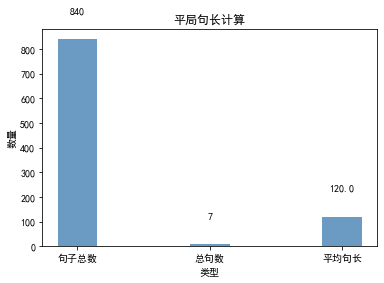

120.0


In [12]:
print(chang_id)
print(samples[chang_id])
print(calculate_avg_length(samples[chang_id], True))

455
　　事件：山西汾酒发布2019年报及2020年1季报，2019年实现营收118.8亿元，同比增长25.79%；归母净利润19.39亿元，同比增长28.63%；拟每10股派9元。    
　　2020Q1实现营收41.4亿元，同比增长1.71%；归母净利润12.25亿元，同比增长39.36%。    
　　点评：    
    毛利率提升，销售费用增幅大，净利率基本稳定。2019年公司酒类销售收入117.45亿元，同比增长25.47%；产量13.73万千升，占山西省酿酒总量的65.6%；销量12.57万千升，同比增加5.01%；毛利率72.16%，同比上升3.37个百分点；期间费用率28.25%，同比上升4.37个百分点，主要为加大全国市场开拓力度销售费用同比增加55.74%，销售费用率21.73%/+4.39pct。净利率17.29%，同比上升0.66个百分点。    
    聚焦核心品牌，中高端产品占比提升，单价上涨。汾酒系列产品收入102.97亿元（+27.65%），占比87.67%（+1.5pct），单价12.12万元/千升（+5.02%），毛利率75.8%（+2.66pct）。竹叶青等配制酒收入5.48亿元（+61.56%），占比4.66%（+1.04pct），单价7.53万元/千升（+14.62%），毛利率64.59%（+2.12pct）。杏花村等系列酒收入9亿元（-5.77%），占比7.66%（-2.54pct），单价2.69万元/千升（+25.71%），毛利率35.2%（+0.84 pct）。    
    电商渠道和省外市场拓展增速快。公司数字化改造传统渠道，拓展线上+线下，店内+店外营销模式。电商渠道收入2.91亿元，同比增长56.2%。此外，批发代理收入100.66亿元，同比增长14.56%；直销收入13.88亿元，同比增长257.42%。分地区看，省内收入57.85亿元，同比增长8.65%，占比49.25%；省外收入59.6亿元，同比增长47.65%，占比50.75%，首超省内。    
　　未来公司将按照“1357”市场策略加快汾酒全国化布局。    
    缴税大幅减少致20Q1净利大增，全年20%左右收入目标。受疫情影响公司2020Q1销售收入仅实现小幅增长，而归母净利润同比增长近四成，其中重要的原因在于疫情影响下商品酒产

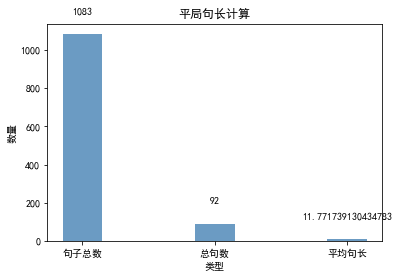

11.771739130434783


In [13]:
print(duan_id)
print(samples[duan_id])
print(calculate_avg_length(samples[duan_id], True))

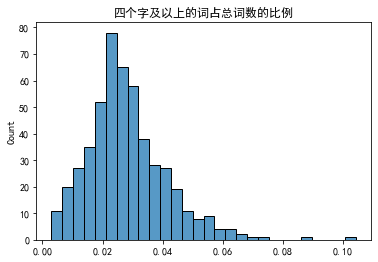

In [15]:
import jieba
import pandas as pd
import re
import random
import seaborn as sns

PATH = 'C:/Users/12968/Desktop/数据科学实战-stock prediction/程序/词典/'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

class FourWords:
    def __init__(self, text):
        self.text = text
        self.stopwords = []

    def read_file(self, filename='C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/新浪公司研报.CSV'):
        """
        提取csv文件中的研报内容，存入list并返回
        :param filename:
        :return:
        """
        data = pd.read_csv(filename)
        return list(data.content)

    def dict_load(self, path):
        dict = []
        with open(path, encoding='utf-8') as f:
            for line in f:
                if line.strip() != '':  # 养成去空好习惯
                    dict.append(line.strip())
        return dict

    def load_dicts(self):
        stop = PATH + 'stop1205.txt'
        self.stopwords = self.dict_load(stop)

    def seg_sentence(self):
        sentence = self.text
        sentence = re.sub(' ', '', re.sub('\xa0\xa0\xa0\r\n', '', sentence))
        jieba.load_userdict('C:/Users/12968/Desktop/数据科学实战-stock prediction/程序/词典/userdict.txt')
        sentence_seged = jieba.cut(sentence.strip())
        outstr = ''
        for word in sentence_seged:
            if word not in self.stopwords:
                if word != '\t':
                    outstr += word
                    outstr += " "
        word_list = outstr.split(' ')
        pattern = '[A-Za-z]*[0-9]*[\'\"\%.\s\@\!\#\$\^\&\*\(\)\-\<\>\?\/\,\~\`\:\;]*[：；”“ ‘’+-——！，。？、~@#￥%……&*（）【】]*'
        t = [re.sub(pattern, "", x.strip()) for x in word_list]
        return [x for x in t if x != '']

    def cal_four(self):
        """
        计算四个字组成的词数占词总数的比例
        :return:
        """
        sum = 0
        for i in self.seg_sentence():
            if len(i) >= 4:
                sum += 1
        return sum / len(self.seg_sentence())


if __name__ == '__main__':
    data = pd.read_csv('C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/新浪公司研报.csv')
    samples = random.sample(list(data['content']), 500)
    result = []
    for sample in samples:
        four = FourWords(sample)
        result.append(four.cal_four())
    sns.histplot(result)
    plt.title('四个字及以上的词占总词数的比例')
    plt.show()

In [11]:
import pandas as pd
company = pd.read_csv("C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/研报数据/company钢铁.csv",encoding = 'gb18030')
industry = pd.read_csv("C:/Users/12968/Desktop/数据科学实战-stock prediction/数据/研报数据/industry化学.csv")

In [15]:
sample1 = list(company['content'])[0]

'\u3000\u3000事件：公司发布2020年年报及2021年一季报，2020年公司实现营业收入49.73 亿元，同比上升1.30%；归母净利润2.58 亿元，同比下降24.91%；2021 年Q1 公司实现营业收入13.54 亿元，同比上升47.38%；归母净利润1.24 亿元，同比增加67.57%。扣非归母净利0.897 亿元，同比增加163.54%。拟每10 股派发现金红利3.10 元人民币（含税）。 ???\n\u3000\u3000点评： ???\n\u3000\u30002021Q1 盈利水平快速提升。2020 全年公司实现营业总收入49.73亿元，同比增1.30%。归母净利润2.58 亿元，同比下降24.91%，主要原因系2019 年因拆迁补偿及转让锻造车间等资产，形成9,916.54 万元资产处置收益，导致上年度基数较高；2020 年公司再次对收购永诚锂业形成的商誉及对应收宜春科丰款项等事项计提资产及信用减值损失约7,800 万元。2021Q1 碳酸锂达产助力业绩快速改善，2021Q1 归母净利润1.24 亿元，同比增加67.57%。扣非归母净利0.897 亿元，同比增加163.54%。2021Q1 公司毛利率/净利率分别为13.76%/9.19%，同比增加2.75/1.16 个百分点。 ???\n\u3000\u3000特钢新材料业务稳步发展。2020 全年公司特钢新材料业务实现营收46.66 亿元，与上年同期基本持平。公司不断提升生产效率，推进产品转型升级，增加高附加值产品比例。疫情影响下，2020 全年特钢新材料实现毛利60,129.82 万元，同比增长1.13%，单吨毛利大于3000元的产品营收占比为29.47%，同比提升10.28 个百分点。一季度特钢新材料贡献归母净利润9,356.43 万元，实现产品销量7.16 万吨。 ???\n\u3000\u3000锂电新能源主体项目顺利达产，低成本优势巩固行业地位。公司年产1 万吨电池级碳酸锂项目顺利投产并快速达产，2020 年全年锂电新能源业务实现营收3.07 亿元,实现碳酸锂产量8,741.82 吨，实现销量9,612.32 吨。2021 一季度锂电新能源业务实现归母净利润3,054.95 万元，碳酸锂销量2,587 吨。公司自有矿山，固定原材料成本，同时重视副产品的综合开发利用，进一步降

In [17]:
sample2 = list(company['content'])[100]
sample2

'\u3000\u3000业绩概要：公司发布2020 年度业绩预增公告，预计2020 年度实现归属于上市公司股东净利润125 亿元-131 亿元，同比增1%-6%，折合EPS 为0.56-0. ???\n\u3000\u300059 元；预计同期归属于上市公司股东的扣除非经常性损益的净利润121 亿元-127 亿元，同比增9%-15%。 ???\n\u3000\u3000吨钢盈利：根据公司公告，公司2020 年前三季度分别实现归母净利15.36 亿元、24.66 亿元和38.57 亿元，若以业绩预告上限测算，第四季度归母净利为52.64 亿元，环比增36.49%，同比增48.34%；若以业绩预告下限测算，第四季度归母净利为46.64 亿元，环比增20.93%，同比增31.43%。根据前期公告，公司前三季度商品坯材销量分别为1059 万吨、1174 万吨和1129 万吨，假设四季度销量与三季度持平，对应吨钢归母净利分别为145 元、210 元、342 元及440 元（取平均），全年吨钢归母净利286 元，同比提升22 元。 ???\n\u3000\u3000四季度业绩亮眼：2020Q4 归母净利创2019 年以来单季度最优，延续三季度业绩边际改善趋势，业绩亮眼仍主要得益于下游汽车、家电及工程机械行业持续回暖，对应板材尤其冷轧需求表现继续向好。根据我们测算，2020Q4 热轧、冷轧及螺纹钢吨钢毛利分别环比变动-11 元、+406 元及+78 元，在四季度原料价格强势的情况下，板材盈利表现相对更优异，其中冷轧在Q3 吨钢毛利环比增加226 元的基础上，Q4 继续环比增加406 元，与下游需求情况一致；热轧在Q3 吨钢毛利环比增加131 元的基础上，Q4 环比仅微降。此外，宝钢作为行业龙头，技术优势叠加服务优势使得产品存在溢价，根据公司披露的期货价格调整通知，2020Q4 冷轧累计提价300-500 元/吨不等，低于行业均价上涨幅度700-800 元/吨，但2021 年1-2 月继续累计提价900-1400 元/吨不等，虽然调价存在一定滞后性，但补涨幅度大幅高于行业平均。 ???\n\u3000\u3000回购公司A 股股份：公司拟用不超过人民币40 亿元的自有资金，以不超过人民币8.09 元/股的价格回购公司A 股股份，回购股份数量不低于4 亿股，不超过5 亿股，占公司回

In [18]:
sample3 = list(industry['content'])[9]
sample4 = list(industry['content'])[90]

In [19]:
sample3

'\u3000\u3000事件：2020 年12 月8 日巴斯夫紧急发函，称其德国路德维希港工厂的正丁醇装置遭遇不可预见的技术问题，被迫关闭装置并开始修理，这次事故超出了巴斯夫的合理控制范围，影响了正丁醇的供应，因此不得不分配正丁醇的供应。 \xa0\xa0\xa0\r\n\u3000\u3000油价处于上行通道，带动大宗商品景气复苏：布油价格自2020 年二季度底部20 多美元逐步上涨至目前50 美元，成本驱动下化工大宗商品价格易上难下，普遍迎来上涨行情。据百川，2020Q3/2020 年10 月/11月/目前的正丁醇价格为5985/6615/8300/9200 元/吨，辛醇价格为7250/7510/9138/10100 元/吨；上游丙烯价格为6976/7284/7080/8025 元/吨；下游丙烯酸丁酯价格为7811/8940/9775/11500 元/吨，醋酸丁酯价格为5704/6170/7313/8600 元/吨，DOP 价格为7219/7550/9238/9750元/吨，丁辛醇产业链景气上行。据百川，目前正丁醇行业毛利约为2348元/吨，辛醇为2215 元/吨，行业利润状况较好。 \xa0\xa0\xa0\r\n\u3000\u3000出口增速超预期，海外迎来补库存周期：据海关总署，11 月份中国以美元计价的货物贸易出口增速为21.1%，前值11.4%，为连续第六个月增长。2020 年初疫情影响下海外需求较弱，下半年海外需求开始复苏，进入补库存周期。据百川，截至12 月10 日全国丁辛醇装置开工情况，正丁醇开工率89.8%，周产量43714 吨，库存低位；辛醇开工率87.3%，周产量41712 吨，库存低位；2019 年正丁醇开工率73.4%，辛醇年开工率76.4%。目前丁辛醇开工率处于高位，而库存低位，补库存周期下利好产品价格维持较高位置。 \xa0\xa0\xa0\r\n\u3000\u3000巴斯夫事故影响下，正丁醇供应进一步趋紧，丁辛醇景气有望走高： \xa0\xa0\xa0\r\n\u3000\u3000据产业网，巴斯夫德国路德维希港正丁醇产能为45 万吨/年。据百川，2020 年我国正丁醇产能254 万吨，辛醇产能249 万吨。此次巴斯夫正丁醇装置关闭，正丁醇在目前行业低库存的情况下，供应将进一步趋紧。由于丁醇和辛醇可在同一套装置中用羟基合成方

In [20]:
sample4

'    事件 \xa0\xa0\xa0\r\n    人民网报道，3 月21 日下午，位于江苏响水县生态化工园区的天嘉宜化工有限公司发生爆炸事故，截至当晚7 点已确认事故造成死亡6 人，重伤30 人，另有部分群众不同程度轻伤。 \xa0\xa0\xa0\r\n    评论 \xa0\xa0\xa0\r\n    多家化工上市公司的产能位于发生事故的江苏盐城响水化工园区。天嘉宜主营间苯二胺、邻苯二胺等精细化工产品，位于江苏盐城响水化工园区。联化科技、雅克科技、安诺其等多家化工上市公司相关产能位于同一园区。预计未来园区将进行安全检查等整顿，园区化工企业或有停产风险。 \xa0\xa0\xa0\r\n    事故影响间苯二胺12%国内产能，预计间苯二胺涨价。间苯二胺下游包括分散染料、间苯二酚等，根据七彩云电商和我们此前调研，国内主流间苯二胺厂商及产能分别为浙江龙盛6.5 万吨（外售近3 万吨）、天嘉宜约1 万吨、四川红光约1 万吨。本次爆炸事件将导致间苯二胺的供应短缺、价格上涨。目前间苯二胺市场价格4.5~5 万元/吨，预计价格将会上涨至6~7 万元/吨。 \xa0\xa0\xa0\r\n    苏北产能复产预计推迟，环保督察收紧染料行业供给。根据卓创资讯，亚邦、闰土等行业龙头2018 年在苏北受限的产能复产进度缓慢，目前分散染料行业仍有近10%的产能受限，主要分布在江苏盐城响水、连云港灌云、灌南等化工园区。我们预计本次爆炸事故将推迟苏北产能复产。随着2019 年第二轮中央生态环境保护督察及“回头看”开启，我们预计染料行业供给继续紧张。 \xa0\xa0\xa0\r\n    看好间苯二胺和分散染料涨价，龙头公司受益。今年以来，主流染料分散黑ECT 300%报价先后于1 月1 日、2 月12 日、3 月18日涨价，目前报价4.7 万元/吨。根据卓创资讯，染料成交价已同比上涨10%。本次爆炸事件导致间苯二胺供应紧张和染料产能复产推迟，叠加环保收紧、需求旺季，看好间苯二胺和分散染料涨价，龙头公司受益。我们测算，染料每上涨1000 元/吨，浙江龙盛、闰土股份净利润增厚1.82/1.05 亿元，EPS 增厚0.06/0.09 元；外售间苯二胺每上涨1000 元/吨，浙江龙盛净利润增厚1800 万元，EPS 增厚0.01 元。 \xa0\xa0\xa0\r\n    风险 \xa

In [21]:
para_flag = ['\xa0\xa0\xa0\r\n', '\xa0\xa0\xa0\r\n\u3000\u3000']
for flag in para_flag:
    if flag in sample4:
        para_list = sample4.split(flag)
para_list

['    事件 ',
 '    人民网报道，3 月21 日下午，位于江苏响水县生态化工园区的天嘉宜化工有限公司发生爆炸事故，截至当晚7 点已确认事故造成死亡6 人，重伤30 人，另有部分群众不同程度轻伤。 ',
 '    评论 ',
 '    多家化工上市公司的产能位于发生事故的江苏盐城响水化工园区。天嘉宜主营间苯二胺、邻苯二胺等精细化工产品，位于江苏盐城响水化工园区。联化科技、雅克科技、安诺其等多家化工上市公司相关产能位于同一园区。预计未来园区将进行安全检查等整顿，园区化工企业或有停产风险。 ',
 '    事故影响间苯二胺12%国内产能，预计间苯二胺涨价。间苯二胺下游包括分散染料、间苯二酚等，根据七彩云电商和我们此前调研，国内主流间苯二胺厂商及产能分别为浙江龙盛6.5 万吨（外售近3 万吨）、天嘉宜约1 万吨、四川红光约1 万吨。本次爆炸事件将导致间苯二胺的供应短缺、价格上涨。目前间苯二胺市场价格4.5~5 万元/吨，预计价格将会上涨至6~7 万元/吨。 ',
 '    苏北产能复产预计推迟，环保督察收紧染料行业供给。根据卓创资讯，亚邦、闰土等行业龙头2018 年在苏北受限的产能复产进度缓慢，目前分散染料行业仍有近10%的产能受限，主要分布在江苏盐城响水、连云港灌云、灌南等化工园区。我们预计本次爆炸事故将推迟苏北产能复产。随着2019 年第二轮中央生态环境保护督察及“回头看”开启，我们预计染料行业供给继续紧张。 ',
 '    看好间苯二胺和分散染料涨价，龙头公司受益。今年以来，主流染料分散黑ECT 300%报价先后于1 月1 日、2 月12 日、3 月18日涨价，目前报价4.7 万元/吨。根据卓创资讯，染料成交价已同比上涨10%。本次爆炸事件导致间苯二胺供应紧张和染料产能复产推迟，叠加环保收紧、需求旺季，看好间苯二胺和分散染料涨价，龙头公司受益。我们测算，染料每上涨1000 元/吨，浙江龙盛、闰土股份净利润增厚1.82/1.05 亿元，EPS 增厚0.06/0.09 元；外售间苯二胺每上涨1000 元/吨，浙江龙盛净利润增厚1800 万元，EPS 增厚0.01 元。 ',
 '    风险 ',
 '    染料行业新增供给增加，下游需求疲软。']

In [25]:
import re
para_list2 = []
for i in para_list:
    i = i.strip()
    para_list2.append(i)
para_list2

['事件',
 '人民网报道，3 月21 日下午，位于江苏响水县生态化工园区的天嘉宜化工有限公司发生爆炸事故，截至当晚7 点已确认事故造成死亡6 人，重伤30 人，另有部分群众不同程度轻伤。',
 '评论',
 '多家化工上市公司的产能位于发生事故的江苏盐城响水化工园区。天嘉宜主营间苯二胺、邻苯二胺等精细化工产品，位于江苏盐城响水化工园区。联化科技、雅克科技、安诺其等多家化工上市公司相关产能位于同一园区。预计未来园区将进行安全检查等整顿，园区化工企业或有停产风险。',
 '事故影响间苯二胺12%国内产能，预计间苯二胺涨价。间苯二胺下游包括分散染料、间苯二酚等，根据七彩云电商和我们此前调研，国内主流间苯二胺厂商及产能分别为浙江龙盛6.5 万吨（外售近3 万吨）、天嘉宜约1 万吨、四川红光约1 万吨。本次爆炸事件将导致间苯二胺的供应短缺、价格上涨。目前间苯二胺市场价格4.5~5 万元/吨，预计价格将会上涨至6~7 万元/吨。',
 '苏北产能复产预计推迟，环保督察收紧染料行业供给。根据卓创资讯，亚邦、闰土等行业龙头2018 年在苏北受限的产能复产进度缓慢，目前分散染料行业仍有近10%的产能受限，主要分布在江苏盐城响水、连云港灌云、灌南等化工园区。我们预计本次爆炸事故将推迟苏北产能复产。随着2019 年第二轮中央生态环境保护督察及“回头看”开启，我们预计染料行业供给继续紧张。',
 '看好间苯二胺和分散染料涨价，龙头公司受益。今年以来，主流染料分散黑ECT 300%报价先后于1 月1 日、2 月12 日、3 月18日涨价，目前报价4.7 万元/吨。根据卓创资讯，染料成交价已同比上涨10%。本次爆炸事件导致间苯二胺供应紧张和染料产能复产推迟，叠加环保收紧、需求旺季，看好间苯二胺和分散染料涨价，龙头公司受益。我们测算，染料每上涨1000 元/吨，浙江龙盛、闰土股份净利润增厚1.82/1.05 亿元，EPS 增厚0.06/0.09 元；外售间苯二胺每上涨1000 元/吨，浙江龙盛净利润增厚1800 万元，EPS 增厚0.01 元。',
 '风险',
 '染料行业新增供给增加，下游需求疲软。']